#### Завдання:
Побудувати моделi класифiкацiї на основi методу дерев рiшень, використовуючи sklearn.tree.neural_network.MLPClassifier.
#### Початковi данi:
(а) import numpy as np \
np.random.seed(0) \
X = np.random.randn(300 , 2 ) \
Y = np.logical_xor(X[:,0] > 0 , X[:,1] > 0) \
(б) sklearn.datasets.load_iris


### Для початку імпортуємо необхідні бібліотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay

### Розглянемо перший набір даних:

In [2]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype('int32')

### Представимо дані графічно

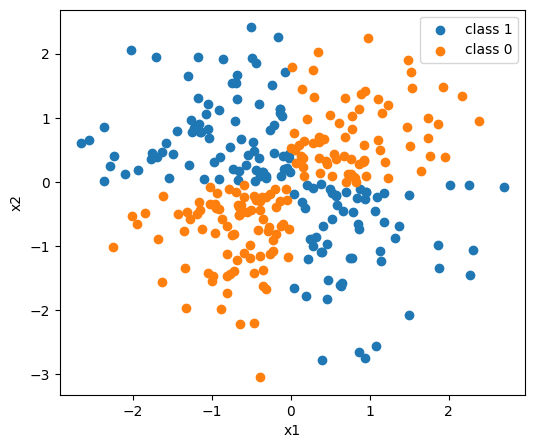

In [3]:
fig, ax = plt.subplots(figsize=(6,5))

data = pd.DataFrame(np.hstack((X, Y.reshape((Y.shape[0], 1)))), columns=['x1', 'x2', 'y'])

ax.scatter(data[data['y'] == 1]['x1'], data[data['y'] == 1]['x2'], label='class 1')
ax.scatter(data[data['y'] == 0]['x1'], data[data['y'] == 0]['x2'], label='class 0')
ax.legend()
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()

### Розбиваємо дані на два набори: навчальний та валідаційний

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Будуємо моделі класифікації

In [5]:
nn1 = MLPClassifier(random_state=3)
nn2 = MLPClassifier(hidden_layer_sizes=(50,), random_state=3)
nn3 = MLPClassifier(hidden_layer_sizes=(20,), random_state=3)
nn1.fit(x_train, y_train)
nn2.fit(x_train, y_train)
nn3.fit(x_train, y_train)

C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20,), random_state=3)

In [6]:
predictions = [model.predict(x_test) for model in [nn1, nn2, nn3]]
i = 1
for predict in predictions:
    print(f'Для моделі {i} маємо прогноз: \n{predict}')
    i += 1

Для моделі 1 маємо прогноз: 
[1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1]
Для моделі 2 маємо прогноз: 
[1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1]
Для моделі 3 маємо прогноз: 
[0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1]


### Перенавчання

In [7]:
i = 1
for model in [nn1, nn2, nn3]:
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f'Модель {i}: \nточність тренування - {train_score}; точність тестування - {test_score}')
    i += 1

Модель 1: 
точність тренування - 0.9761904761904762; точність тестування - 0.9444444444444444
Модель 2: 
точність тренування - 0.9047619047619048; точність тестування - 0.9111111111111111
Модель 3: 
точність тренування - 0.8666666666666667; точність тестування - 0.8555555555555555


Можемо побачити, що перші 1 та 3 моделі є перенавченими в деякій мірі, оскільки є невелика різниця оцінок передбачень. В той час як 2 скоріше недонавчена, ніж перенавчена. Хоча різниця між точностями у всіх моделей не така велика, щоб можна було виносити впевнені судження про їхнє перенавчання.

### Границі рішень

In [8]:
def show_boundary(data, model_list, figsize=(7,14)):
    fig, ax = plt.subplots(nrows=3, figsize=figsize)
    for model in model_list:
        DecisionBoundaryDisplay.from_estimator(model, data[['x1', 'x2']],
                                               response_method='predict', plot_method='pcolormesh', ax=ax[model_list.index(model)])
        ax[model_list.index(model)].scatter(data['x1'], data['x2'], c=data['y'], edgecolor='k')           
        ax[model_list.index(model)].set_title(f'Модель {model_list.index(model)+1}')

C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


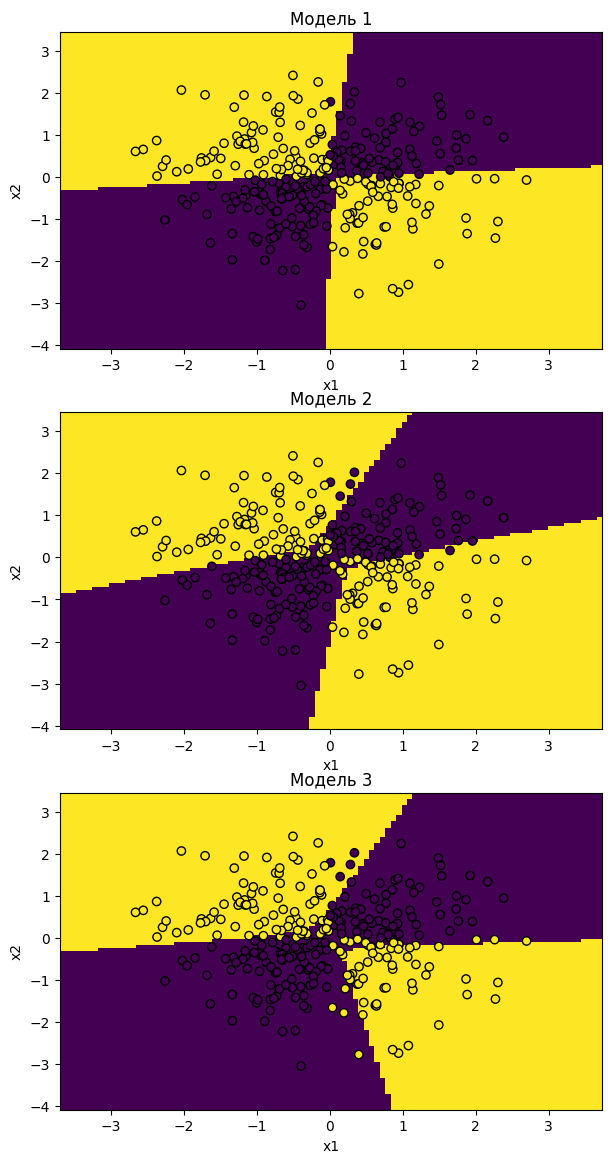

In [9]:
show_boundary(data, [nn1, nn2, nn3])

### Метрики

In [10]:
def calculate_metric(model, metric, x, y):
    pred = model.predict(x)
    return metric(y, pred)

In [11]:
metrics_list = [metrics.confusion_matrix, metrics.precision_score,
           metrics.recall_score, metrics.f1_score]

In [12]:
i=1
for model in [nn1, nn2, nn3]:
    print(f'Neural network {i}')
    for metric in metrics_list:
        print(f'_Metric {metric.__name__}')
        print(f'Train: {calculate_metric(model, metric, x_train, y_train)};\nTest: {calculate_metric(model, metric, x_test, y_test)}')
    i += 1
    print('\n')

Neural network 1
_Metric confusion_matrix
Train: [[109   1]
 [  4  96]];
Test: [[45  3]
 [ 2 40]]
_Metric precision_score
Train: 0.9896907216494846;
Test: 0.9302325581395349
_Metric recall_score
Train: 0.96;
Test: 0.9523809523809523
_Metric f1_score
Train: 0.9746192893401014;
Test: 0.9411764705882352


Neural network 2
_Metric confusion_matrix
Train: [[106   4]
 [ 16  84]];
Test: [[46  2]
 [ 6 36]]
_Metric precision_score
Train: 0.9545454545454546;
Test: 0.9473684210526315
_Metric recall_score
Train: 0.84;
Test: 0.8571428571428571
_Metric f1_score
Train: 0.8936170212765958;
Test: 0.9


Neural network 3
_Metric confusion_matrix
Train: [[108   2]
 [ 26  74]];
Test: [[46  2]
 [11 31]]
_Metric precision_score
Train: 0.9736842105263158;
Test: 0.9393939393939394
_Metric recall_score
Train: 0.74;
Test: 0.7380952380952381
_Metric f1_score
Train: 0.8409090909090909;
Test: 0.8266666666666667




### Решітчастий пошук

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'hidden_layer_sizes': [(20,), (40,), (50,), (80,)]
}

grid_nn = MLPClassifier(random_state=3)
clf = GridSearchCV(grid_nn, parameters)
clf.fit(x_train, y_train)

C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

GridSearchCV(estimator=MLPClassifier(random_state=3),
             param_grid={'hidden_layer_sizes': [(20,), (40,), (50,), (80,)]})

In [14]:
clf.best_params_

{'hidden_layer_sizes': (40,)}

In [15]:
clf.score(x_test, y_test)

0.9111111111111111

 У висновку, оскільки grid search не дав нам кращих результатів, то модель nn3 є найкращою.

### Навчимо моделі на підмножинах даних

In [16]:
nn1.fit(x_train[:100], y_train[:100])
print('100 екземплярів:', nn1.score(x_test, y_test))
nn1.fit(x_train[:50], y_train[:50])
print('50 екземплярів:', nn1.score(x_test, y_test))
nn1.fit(x_train[:30], y_train[:30])
print('30 екземплярів:', nn1.score(x_test, y_test))

100 екземплярів: 0.9666666666666667
50 екземплярів: 0.9333333333333333
30 екземплярів: 0.9777777777777777


C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Як бачимо, загалом, точність на валідаційних даних падає, але можуть бути і виключення

### Розглянемо другий набір даних:

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

### Представимо дані графічно

In [18]:
X, Y = iris.data, iris.target
data = pd.DataFrame(np.hstack((X, Y.reshape(Y.shape[0], 1))), columns=iris.feature_names+['target'])
data['target'].replace([0,1,2], iris.target_names, inplace=True)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Розбиваємо на навчальний та валідаційний набори

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Будуємо моделі

In [20]:
nn1 = MLPClassifier(random_state=3)
nn2 = MLPClassifier(hidden_layer_sizes=(50,25), random_state=3)
nn3 = MLPClassifier(hidden_layer_sizes=(120,40,6), random_state=3)
nn1.fit(x_train, y_train)
nn2.fit(x_train, y_train)
nn3.fit(x_train, y_train)

C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(120, 40, 6), random_state=3)

### Виконаємо прогнози

In [21]:
predictions = [model.predict(x_test) for model in [nn1, nn2, nn3]]
i = 1
for predict in predictions:
    print(f'Для моделі {i} маємо прогноз: \n{predict}')
    i += 1

Для моделі 1 маємо прогноз: 
[1 2 0 2 0 1 0 2 2 2 0 1 0 2 0 1 1 0 1 2 0 0 1 0 0 0 1 2 2 0 2 0 1 1 0 2 0
 0 2 2 2 1 1 0 0]
Для моделі 2 маємо прогноз: 
[1 2 0 2 0 1 0 2 2 2 0 1 0 2 0 1 1 0 1 2 0 0 2 0 0 0 1 2 2 0 2 0 1 1 0 2 0
 0 2 2 2 1 1 0 0]
Для моделі 3 маємо прогноз: 
[1 2 0 2 0 1 0 2 2 2 0 1 0 2 0 1 1 0 1 2 0 0 2 0 0 0 1 2 2 1 2 0 1 1 0 2 0
 0 2 2 2 1 1 0 0]


### Перенавчання

In [22]:
i = 1
for model in [nn1, nn2, nn3]:
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f'Модель {i}: \nточність тренування - {train_score}; точність тестування - {test_score}')
    i += 1

Модель 1: 
точність тренування - 0.9714285714285714; точність тестування - 1.0
Модель 2: 
точність тренування - 0.9714285714285714; точність тестування - 0.9777777777777777
Модель 3: 
точність тренування - 0.9809523809523809; точність тестування - 0.9555555555555556


Можемо зробити висновок, що 3 модель є трохи перенавченою.

### Границі рішень

In [23]:
from sklearn.base import clone

data['target'].replace(iris.target_names, [0,1,2], inplace=True)

def show_boundary(data, model_list, feature_names, x_train, y_train, figsize=(7,14)):
    fig, ax = plt.subplots(nrows=3, figsize=figsize)
    for model in model_list:
        m = clone(model)
        m.fit(x_train[:, [0,1]], y_train)
        DecisionBoundaryDisplay.from_estimator(m, data[feature_names],
                                               response_method='predict', plot_method='pcolormesh', ax=ax[model_list.index(model)])
        ax[model_list.index(model)].scatter(data[feature_names[0]], data[feature_names[1]], c=data['target'], edgecolor='k')           
        ax[model_list.index(model)].set_title(f'Модель {model_list.index(model)+1}')

C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-

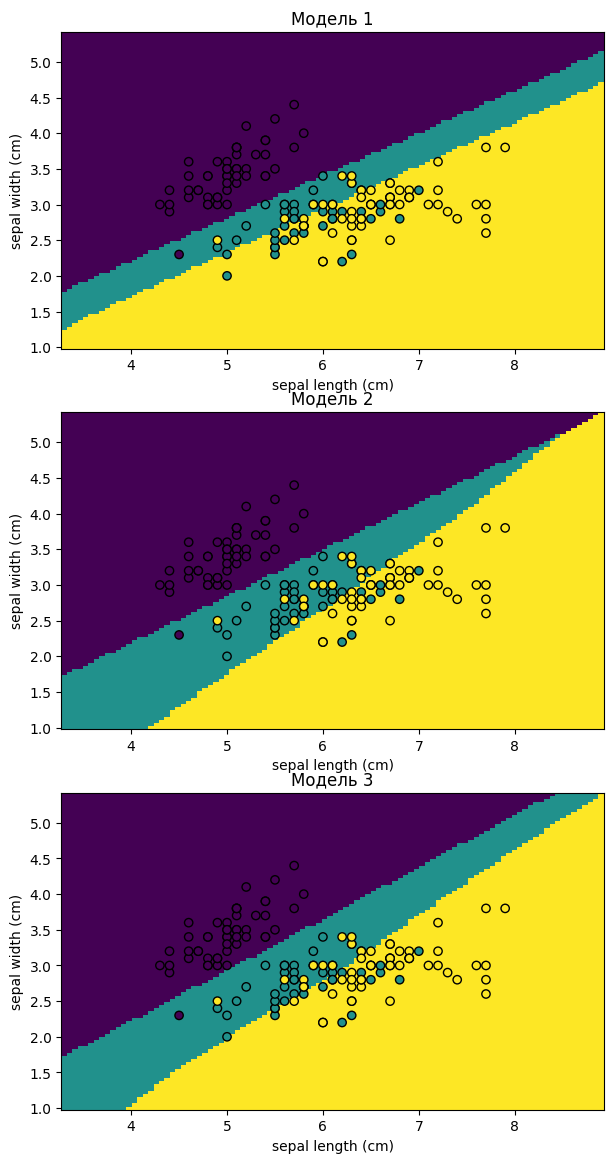

In [24]:
show_boundary(data, [nn1, nn2, nn3], iris.feature_names[:2], x_train, y_train)

### Метрики

In [25]:
def calculate_metric_b(model, metric, x, y, average='binary'):
    pred = model.predict(x)
    if metric.__name__ != 'confusion_matrix':
        return metric(y, pred, average=average)
    else:
        return metric(y, pred)

In [26]:
i=1
for model in [nn1, nn2, nn3]:
    print(f'Model {i}')
    for metric in metrics_list:
        print(f'_Metric {metric.__name__}')
        print(f'Train: {calculate_metric_b(model, metric, x_train, y_train, "micro")};\nTest: {calculate_metric_b(model, metric, x_test, y_test, "micro")}')
    i += 1
    print('\n')

Model 1
_Metric confusion_matrix
Train: [[31  0  0]
 [ 0 35  3]
 [ 0  0 36]];
Test: [[19  0  0]
 [ 0 12  0]
 [ 0  0 14]]
_Metric precision_score
Train: 0.9714285714285714;
Test: 1.0
_Metric recall_score
Train: 0.9714285714285714;
Test: 1.0
_Metric f1_score
Train: 0.9714285714285714;
Test: 1.0


Model 2
_Metric confusion_matrix
Train: [[31  0  0]
 [ 0 36  2]
 [ 0  1 35]];
Test: [[19  0  0]
 [ 0 11  1]
 [ 0  0 14]]
_Metric precision_score
Train: 0.9714285714285714;
Test: 0.9777777777777777
_Metric recall_score
Train: 0.9714285714285714;
Test: 0.9777777777777777
_Metric f1_score
Train: 0.9714285714285714;
Test: 0.9777777777777777


Model 3
_Metric confusion_matrix
Train: [[31  0  0]
 [ 0 37  1]
 [ 0  1 35]];
Test: [[18  1  0]
 [ 0 11  1]
 [ 0  0 14]]
_Metric precision_score
Train: 0.9809523809523809;
Test: 0.9555555555555556
_Metric recall_score
Train: 0.9809523809523809;
Test: 0.9555555555555556
_Metric f1_score
Train: 0.9809523809523809;
Test: 0.9555555555555556




### Решітчастий пошук

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'hidden_layer_sizes': [(48,48,8), (26,64,12), (12,24,24,4), (80,40,20)]
}

grid_nn = MLPClassifier(random_state=3)
clf = GridSearchCV(grid_nn, parameters)
clf.fit(x_train, y_train)

C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\FloralCode\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

GridSearchCV(estimator=MLPClassifier(random_state=3),
             param_grid={'hidden_layer_sizes': [(48, 48, 8), (26, 64, 12),
                                                (12, 24, 24, 4),
                                                (80, 40, 20)]})

In [28]:
clf.best_params_

{'hidden_layer_sizes': (48, 48, 8)}

In [29]:
clf.score(x_test, y_test)

0.9777777777777777

In [30]:
clf.score(x_train, y_train)

0.9904761904761905

Найкраща модель, яка в нас вийшла - перша, оскільки має непогану точність на тренувальних даних, та хороше узагальнення для незнайомих даних.